## Feature Scaling

A data preprocessing technique used to standardize the range of independent variables or features in a dataset. It ensures that all features have the same scale, preventing any single feature from disproportionately influencing the model due to its magnitude.

In many machine learning algorithms, especially those that rely on distance metrics (like k-nearest neighbors, support vector machines, and gradient descent-based models), features with larger values can dominate those with smaller values, leading to biased predictions or slow convergence during training.

## Why do we need it?

**1. Equal Weightage to All Features:**

In datasets, features can have different ranges (e.g., age might range from 0 to 100, while income might range from 1,000 to 1,000,000). Without scaling, algorithms that rely on distances (like K-Nearest Neighbors, Support Vector Machines) would give more importance to features with larger ranges, making the model biased toward these features.

**2. Improved Model Convergence:**

Many machine learning algorithms, such as gradient descent-based methods (e.g., linear regression, logistic regression, neural networks), require features to be scaled for faster and more stable convergence. If features are on very different scales, the optimization algorithm can struggle to converge to an optimal solution because it will take larger steps in the direction of larger magnitude features and smaller steps for features with smaller values.

**3. Algorithm Assumptions:**

Some algorithms (e.g., Principal Component Analysis, PCA) assume that all features are centered at zero and have the same variance. Without scaling, these algorithms won’t work as intended or could lead to misleading results.

**4. Helps in Regularization:**

In regularized models (e.g., Ridge, Lasso), feature scaling ensures that regularization works evenly across all features. Without scaling, regularization can penalize some features more than others based on their range, leading to suboptimal models.

## Types of Feature Scaling

### 1. Standardization (Z-Score Normalization)

Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1. Each value is centered around the mean and scaled by the standard deviation.
Xstd = X - μ / σ

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate random data for Age and Salary
age = np.random.randint(18, 65, size=100)
salary = np.random.randint(25000, 100000, size=100)

In [4]:
# Create a DataFrame
df = pd.DataFrame({'Age': age, 'Salary': salary})

In [7]:
# Display the original data
print("Original Data:")
print(df.head())

Original Data:
   Age  Salary
0   56   27695
1   46   73190
2   32   30258
3   60   64504
4   25   58159


In [6]:
df.shape

(100, 2)

In [10]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Initialize StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
scaler.mean_

array([4.12625000e+01, 6.26049125e+04])

In [15]:
# Transform the test data using the same scaler (but don't fit again)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Convert the scaled data into DataFrames for easy viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [22]:
np.round(X_train.describe())

,Age,Salary
count,80.0,80.0
mean,41.0,62605.0
std,14.0,21683.0
min,18.0,25206.0
25%,29.0,46972.0
50%,41.0,62890.0
75%,55.0,80715.0
max,64.0,98530.0


In [25]:
np.round(X_train_scaled_df.describe())

,Age,Salary
count,80.0,80.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


## Effect of Scaling

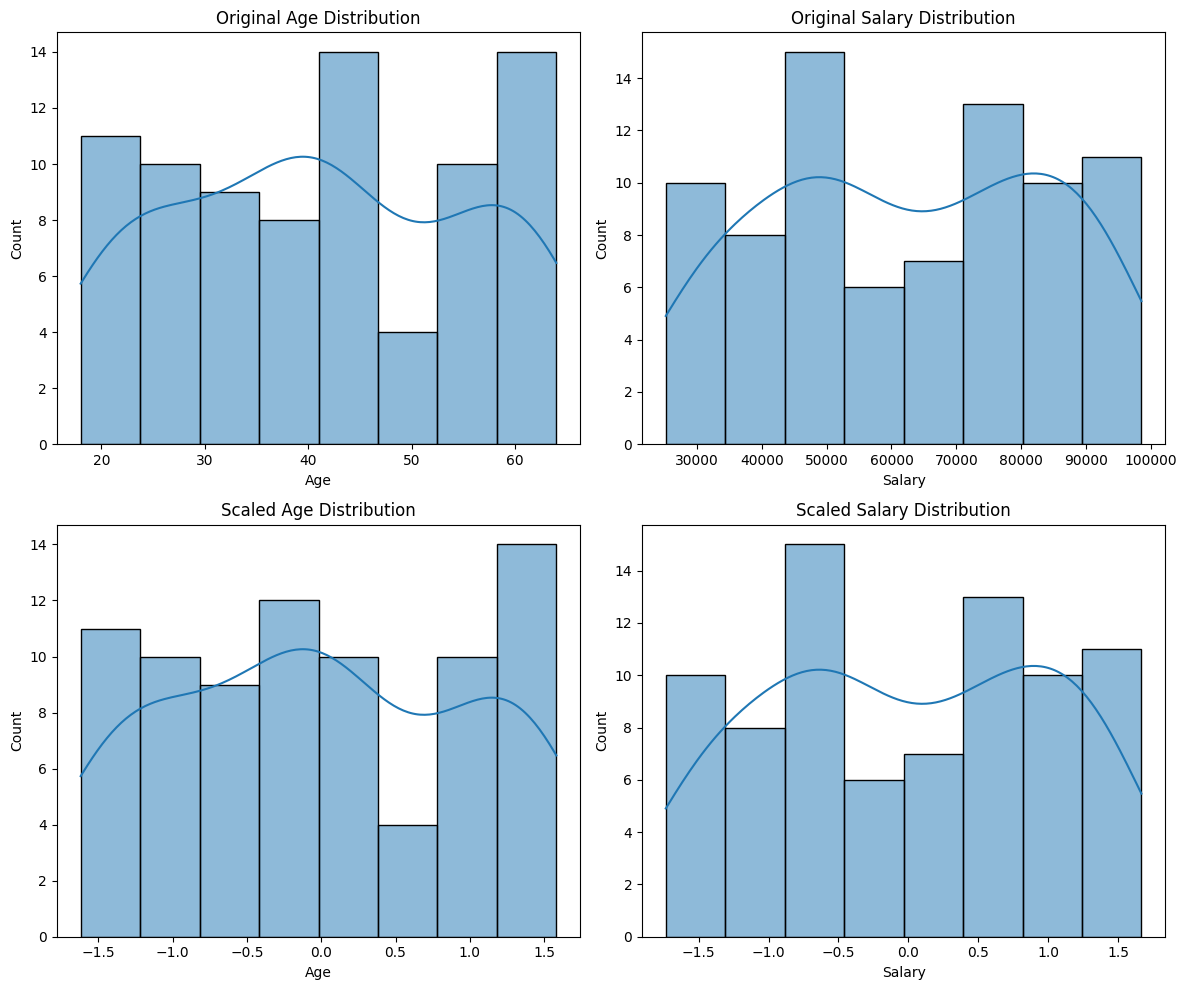

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Original Age - Histogram
sns.histplot(X_train['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Age Distribution')

# Original Salary - Histogram
sns.histplot(X_train['Salary'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Original Salary Distribution')

# Scaled Age - Histogram
sns.histplot(X_train_scaled_df['Age'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Scaled Age Distribution')

# Scaled Salary - Histogram
sns.histplot(X_train_scaled_df['Salary'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Scaled Salary Distribution')

plt.tight_layout()
plt.show()

## Why Scaling is Important?

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
# Generate binary target variable (e.g., 0 or 1)
target = np.random.randint(0, 2, size=100)

In [40]:
# Create a DataFrame
df = pd.DataFrame({'Age': age, 'Salary': salary, 'Target': target})

In [41]:
# Split the dataset into features and target
X = df[['Age', 'Salary']]
y = df['Target']

In [43]:
# Standardize the data using StandardScaler
scaler = StandardScaler()

In [44]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Initialize Logistic Regression model
model = LogisticRegression()

In [46]:
# Train on actual (unscaled) data
model.fit(X_train, y_train)
y_pred_actual = model.predict(X_test)

In [47]:
# Train on scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

In [48]:
# Evaluate the models
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_actual), accuracy_score(y_test, y_pred_scaled)],
    "Precision": [precision_score(y_test, y_pred_actual), precision_score(y_test, y_pred_scaled)],
    "Recall": [recall_score(y_test, y_pred_actual), recall_score(y_test, y_pred_scaled)],
    "F1 Score": [f1_score(y_test, y_pred_actual), f1_score(y_test, y_pred_scaled)]
}

In [49]:
# Convert metrics dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics, index=['Actual Data', 'Scaled Data'])

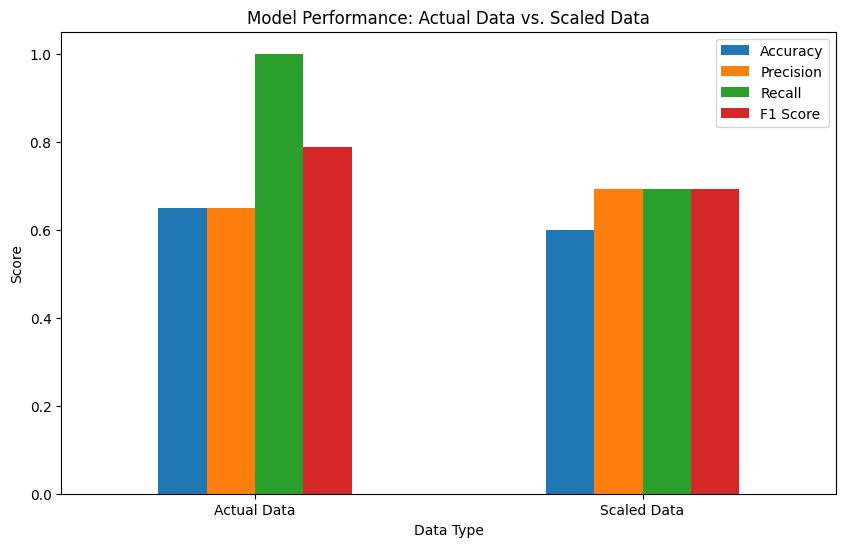

In [50]:
# Plotting the comparison of metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance: Actual Data vs. Scaled Data')
plt.ylabel('Score')
plt.xlabel('Data Type')
plt.xticks(rotation=0)
plt.show()

In [51]:
# Print the metrics for both models
print(metrics_df)

             Accuracy  Precision    Recall  F1 Score
Actual Data      0.65   0.650000  1.000000  0.787879
Scaled Data      0.60   0.692308  0.692308  0.692308


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Initialize Decision Tree model
model_1 = DecisionTreeClassifier(random_state=42)

In [54]:
# Train on actual (unscaled) data
model_1.fit(X_train, y_train)
y_pred_actual = model_1.predict(X_test)

In [55]:
# Train on scaled data
model_1.fit(X_train_scaled, y_train)
y_pred_scaled = model_1.predict(X_test_scaled)

In [56]:
# Evaluate the models
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_actual), accuracy_score(y_test, y_pred_scaled)],
    "Precision": [precision_score(y_test, y_pred_actual), precision_score(y_test, y_pred_scaled)],
    "Recall": [recall_score(y_test, y_pred_actual), recall_score(y_test, y_pred_scaled)],
    "F1 Score": [f1_score(y_test, y_pred_actual), f1_score(y_test, y_pred_scaled)]
}

In [57]:
# Convert metrics dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics, index=['Actual Data', 'Scaled Data'])

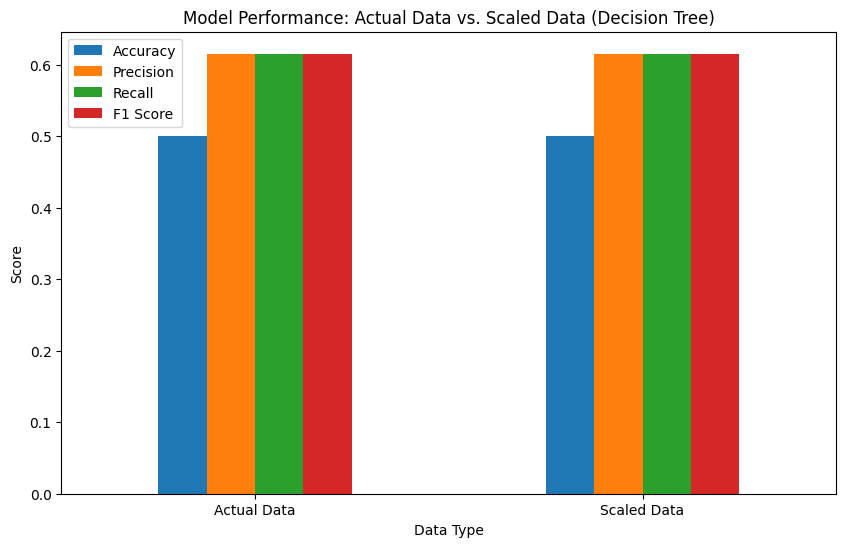

In [59]:
# Plotting the comparison of metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance: Actual Data vs. Scaled Data (Decision Tree)')
plt.ylabel('Score')
plt.xlabel('Data Type')
plt.xticks(rotation=0)
plt.show()

In [58]:
# Print the metrics for both models
print(metrics_df)

             Accuracy  Precision    Recall  F1 Score
Actual Data       0.5   0.615385  0.615385  0.615385
Scaled Data       0.5   0.615385  0.615385  0.615385


## Effect of Outlier

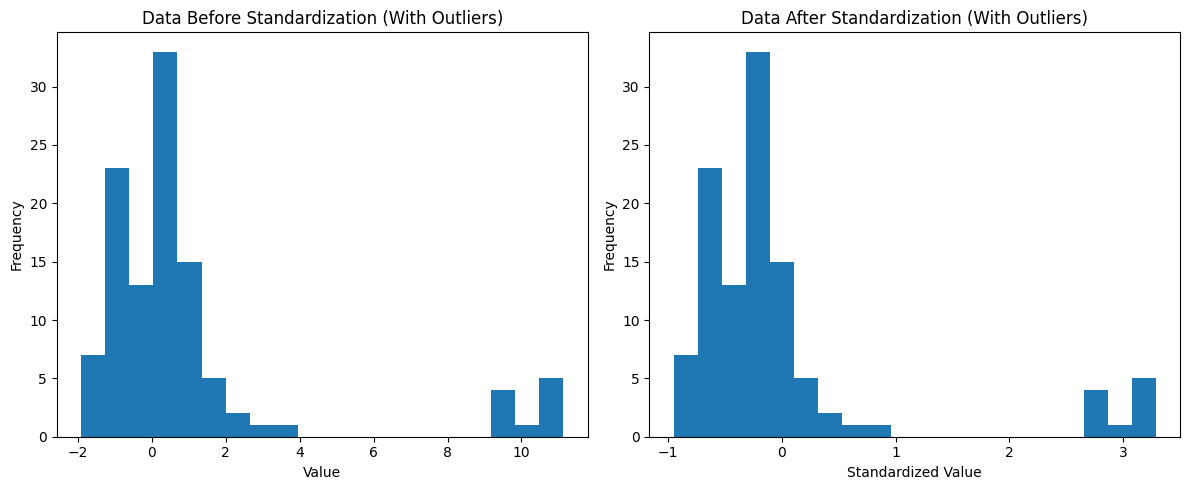

Mean and Std Dev Before Standardization (With Outliers): 1.0109434572940952 3.079828947131005
Mean and Std Dev After Standardization (With Outliers): 7.670631806501082e-17 1.0


In [61]:
data = np.random.normal(0, 1, 100) 

outliers = np.random.normal(10, 1, 10) 
data_with_outliers = np.concatenate([data, outliers])

# Visualize data before standardization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Data Before Standardization (With Outliers)")
plt.hist(data_with_outliers, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")

# Standardize data (with outliers)
scaler = StandardScaler()
data_scaled_with_outliers = scaler.fit_transform(data_with_outliers.reshape(-1, 1))

# Visualize scaled data
plt.subplot(1, 2, 2)
plt.title("Data After Standardization (With Outliers)")
plt.hist(data_scaled_with_outliers, bins=20)
plt.xlabel("Standardized Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Show mean and std deviation before and after standardization
print("Mean and Std Dev Before Standardization (With Outliers):", np.mean(data_with_outliers), np.std(data_with_outliers))
print("Mean and Std Dev After Standardization (With Outliers):", np.mean(data_scaled_with_outliers), np.std(data_scaled_with_outliers))

## When to use Standardization?

#### 1. Algorithms That Assume Normally Distributed Data

* Linear Regression
* Logistic Regression
* Linear Discriminant Analysis (LDA)
* Naive Bayes (Gaussian variant)

#### 2. Distance-Based Algorithms

* K-Nearest Neighbors (KNN)
* Support Vector Machines (SVM)
* K-Means Clustering

#### 3. Gradient Descent-Based Algorithms

* Neural Networks (including Deep Learning models)
* Linear and Logistic Regression
* SVM with RBF kernel

#### 4. Regularization Techniques

* Ridge Regression (L2 Regularization)
* Lasso Regression (L1 Regularization)

#### 5. PCA (Principal Component Analysis)

## When Not to Use Standardization?

* Decision Trees
* Random Forests
* Gradient Boosted Trees

When your data has a very small range of values: If features are already close to a similar scale (e.g., between 0 and 1), standardization might not be necessary and might only add complexity.